In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

!pip install --quiet lazypredict
from lazypredict.Supervised import LazyClassifier

import seaborn as sns
import matplotlib.pyplot as plt

import joblib
import random
from IPython.display import display, Markdown

import warnings
warnings.filterwarnings('ignore')

In [6]:
crop_suitability_attributes = pd.read_csv(r'C:\Users\MOHAMMED GHANI\Desktop\crop recommendataion\Crop_recommendation.csv')
crop_suitability_attributes

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,rice
1,85,58,41,21.77,80.32,7.04,226.66,rice
2,60,55,44,23.00,82.32,7.84,263.96,rice
3,74,35,40,26.49,80.16,6.98,242.86,rice
4,78,42,42,20.13,81.60,7.63,262.72,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,coffee
2196,99,15,27,27.42,56.64,6.09,127.92,coffee
2197,118,33,30,24.13,67.23,6.36,173.32,coffee
2198,117,32,34,26.27,52.13,6.76,127.18,coffee


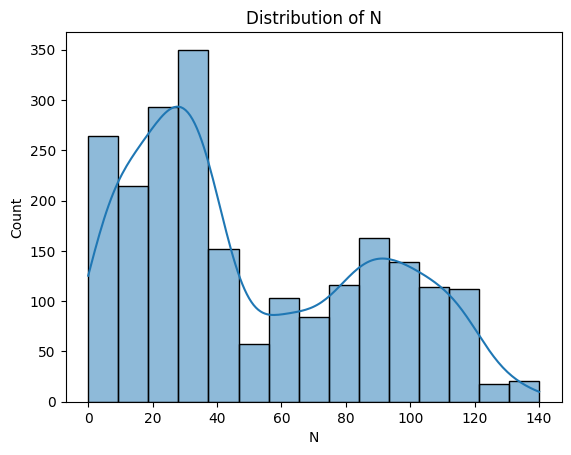

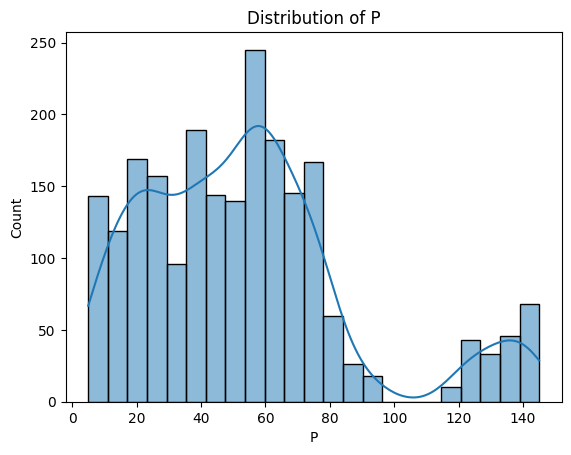

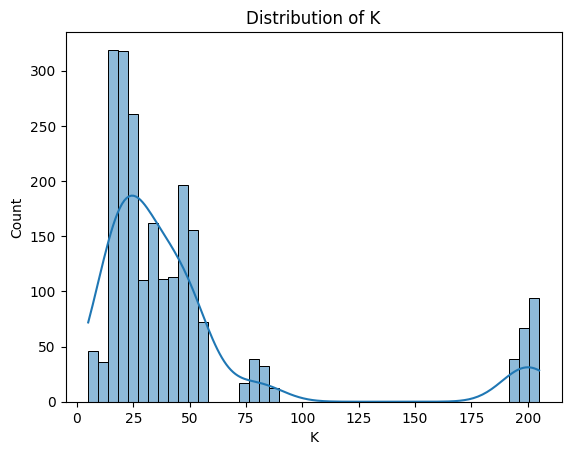

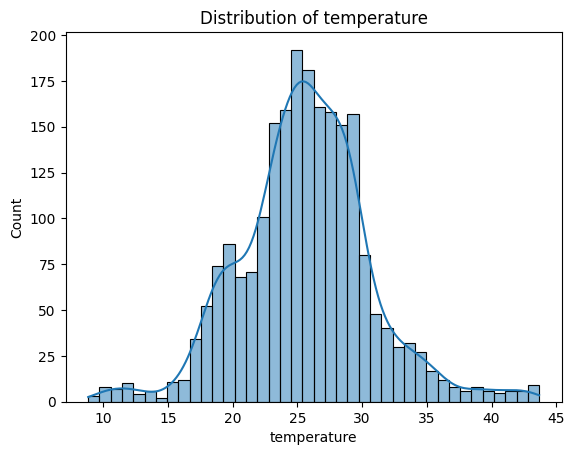

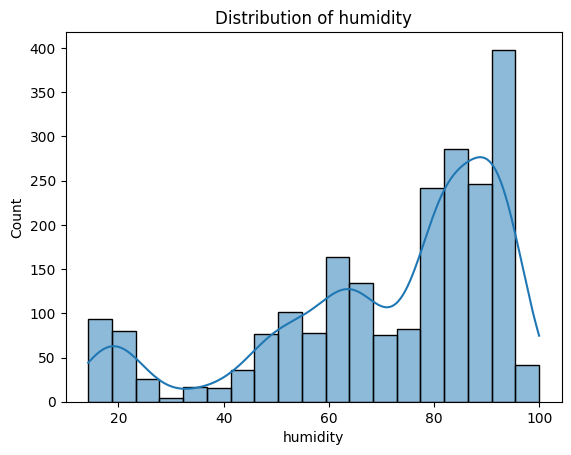

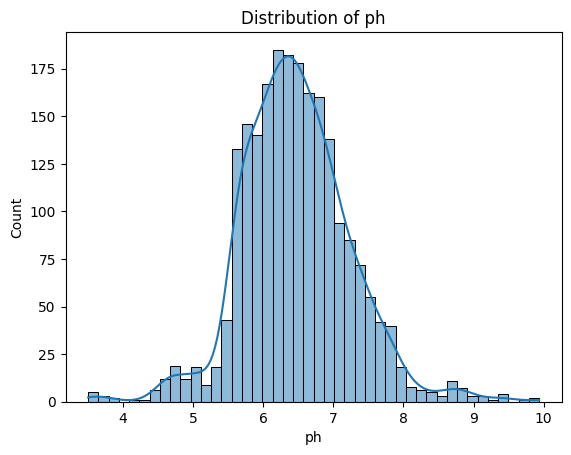

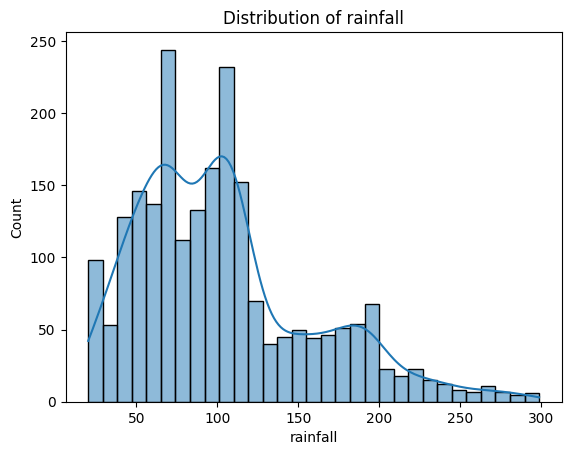

In [7]:
for col in crop_suitability_attributes.drop('label', axis = 1).columns.tolist():
    sns.histplot(crop_suitability_attributes[col], kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [8]:
crop_suitability_attributes['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
proper_name_mapping = {
    'rice': 'Rice',
    'maize': 'Maize (Corn)',
    'chickpea': 'Chickpea',
    'kidneybeans': 'Kidney Beans',
    'pigeonpeas': 'Pigeon Peas',
    'mothbeans': 'Moth Beans',
    'mungbean': 'Mung Bean',
    'blackgram': 'Black Gram',
    'lentil': 'Lentil',
    'pomegranate': 'Pomegranate',
    'banana': 'Banana',
    'mango': 'Mango',
    'grapes': 'Grapes',
    'watermelon': 'Watermelon',
    'muskmelon': 'Muskmelon',
    'apple': 'Apple',
    'orange': 'Orange',
    'papaya': 'Papaya',
    'coconut': 'Coconut',
    'cotton': 'Cotton',
    'jute': 'Jute',
    'coffee': 'Coffee'
}

crop_suitability_attributes['label'] = crop_suitability_attributes['label'].map(proper_name_mapping)
crop_suitability_attributes

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,Rice
1,85,58,41,21.77,80.32,7.04,226.66,Rice
2,60,55,44,23.00,82.32,7.84,263.96,Rice
3,74,35,40,26.49,80.16,6.98,242.86,Rice
4,78,42,42,20.13,81.60,7.63,262.72,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,Coffee
2196,99,15,27,27.42,56.64,6.09,127.92,Coffee
2197,118,33,30,24.13,67.23,6.36,173.32,Coffee
2198,117,32,34,26.27,52.13,6.76,127.18,Coffee


In [10]:
label_encoder = LabelEncoder()
crop_suitability_attributes['label'] = label_encoder.fit_transform(crop_suitability_attributes['label'])
crop_suitability_attributes

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.88,82.00,6.50,202.94,20
1,85,58,41,21.77,80.32,7.04,226.66,20
2,60,55,44,23.00,82.32,7.84,263.96,20
3,74,35,40,26.49,80.16,6.98,242.86,20
4,78,42,42,20.13,81.60,7.63,262.72,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,5
2196,99,15,27,27.42,56.64,6.09,127.92,5
2197,118,33,30,24.13,67.23,6.36,173.32,5
2198,117,32,34,26.27,52.13,6.76,127.18,5


In [11]:
def evaluateLazyClassifiers(data, features_for_classification):
    features = data.drop(features_for_classification, axis = 1)
    targets = data[features_for_classification]
    features_train, features_test, targets_train, targets_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)
    
    lazyClassifier = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
    models, predictions = lazyClassifier.fit(features_train, features_test, targets_train, targets_test)
    return models, features_train, features_test, targets_train, targets_test


In [12]:
models, features_train, features_test, targets_train, targets_test = evaluateLazyClassifiers(crop_suitability_attributes, ['label'])

 97%|█████████▋| 30/31 [00:02<00:00,  8.48it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[

100%|██████████| 31/31 [00:03<00:00,  8.50it/s]


In [13]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,1.00,1.00,None,1.00,0.02
RandomForestClassifier,0.99,0.99,None,0.99,0.32
QuadraticDiscriminantAnalysis,0.99,0.99,None,0.99,0.02
BaggingClassifier,0.99,0.99,None,0.99,0.09
ExtraTreesClassifier,0.99,0.99,None,0.99,0.18
XGBClassifier,0.99,0.99,None,0.99,0.58
DecisionTreeClassifier,0.99,0.99,None,0.99,0.03
LGBMClassifier,0.99,0.99,None,0.99,0.89
LabelPropagation,0.97,0.97,None,0.97,0.10


In [14]:
gnb = GaussianNB()
gnb.fit(features_train, targets_train)

targets_pred = gnb.predict(features_test)

In [15]:
print("Accuracy:", accuracy_score(targets_test, targets_pred))
print("Classification Report:\n", classification_report(targets_test, targets_pred, target_names = label_encoder.classes_))

Accuracy: 0.9954545454545455
Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
  Black Gram       1.00      1.00      1.00        20
    Chickpea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
Kidney Beans       1.00      1.00      1.00        20
      Lentil       1.00      1.00      1.00        11
Maize (Corn)       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
  Moth Beans       1.00      1.00      1.00        24
   Mung Bean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00     

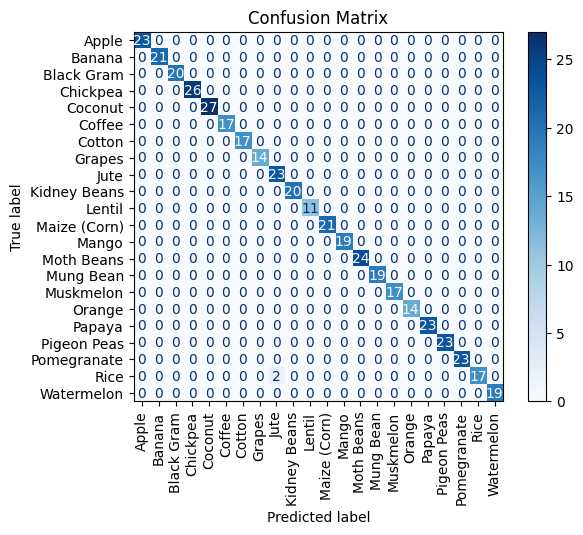

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(targets_test, targets_pred), display_labels = label_encoder.classes_)

disp.plot(cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xticks(rotation = 90)
plt.show()

In [17]:
cv_scores = cross_val_score(GaussianNB(), features_test, targets_test, cv = 5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.98863636 0.98863636 0.97727273 1.         1.        ]
Mean CV Accuracy: 0.990909090909091


In [18]:
joblib.dump(gnb, "gaussiannb_crop_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']